In [1]:
import matplotlib.pyplot as plt
import mediapipe as mp
from skimage import (
    transform,
    util,
)

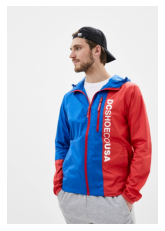

In [2]:
im = plt.imread('data/preprocessing/original1.jpg')
plt.imshow(im)
plt.axis('off')
plt.show()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Nose tip:
x: 0.41781800985336304
y: 0.23514971137046814



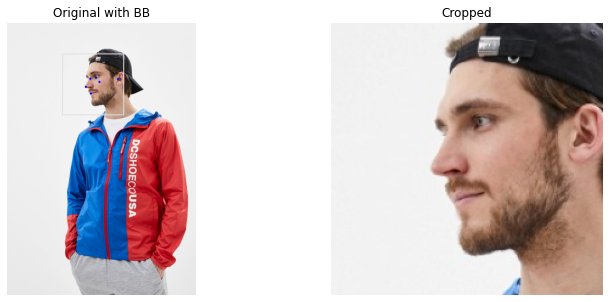

In [3]:
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

def upscale_bb(bb, alpha=0.75):
    h, w = bb.height, bb.width
    bb.xmin = max(0.0, bb.xmin - alpha * w / 2)
    bb.ymin = max(0.0, bb.ymin - alpha * h / 2)
    bb.width = min (1.0 - bb.xmin, bb.width * (1 + alpha))
    bb.height = min (1.0 - bb.ymin, bb.height * (1 + alpha))
    
    return bb

with mp_face_detection.FaceDetection(
    model_selection=1,
    min_detection_confidence=0.5,
) as face_detection:
    results = face_detection.process(im)
    annotated_image = im.copy()
    bb = None
    
    for detection in results.detections:
        print('Nose tip:')
        print(mp_face_detection.get_key_point(
          detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
        
        bb = detection.location_data.relative_bounding_box
        bb = upscale_bb(bb)
        
        mp_drawing.draw_detection(annotated_image, detection)
        
    assert bb is not None, 'No face found!'
    h, w, _ = im.shape
    
    cropped = util.crop(
        im,
        (
            (int(h * bb.ymin), int(h * (1 - bb.ymin - bb.height))),
            (int(w * bb.xmin), int(w * (1 - bb.xmin - bb.width))),
            (0,0)
        ),
        copy=True
    )
    cropped = transform.resize(cropped, (224, 224, 3))
        
    plt.figure(figsize=(12, 5))
    
    plt.subplot(121)
    plt.title('Original with BB')
    plt.imshow(annotated_image)
    plt.axis('off')
    
    plt.subplot(122)
    plt.title('Cropped')
    plt.imshow(cropped)
    plt.axis('off')
    plt.show()

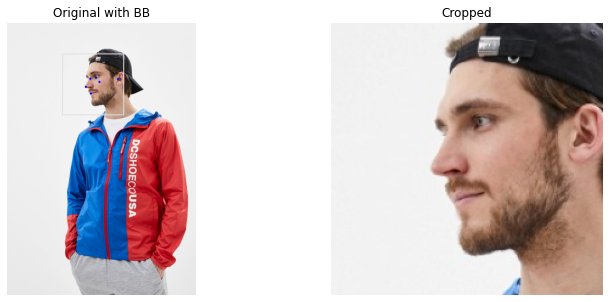

In [4]:
from lib.models.face_cropper import FaceCropper

fc = FaceCropper()

plt.figure(figsize=(12, 5))
    
plt.subplot(121)
plt.title('Original with BB')
plt.imshow(annotated_image)
plt.axis('off')

plt.subplot(122)
plt.title('Cropped')
plt.imshow(
    fc.apply(im),
)
plt.axis('off')
plt.show()